In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

In [3]:
# Question 5.1

def pendulum(a_0, v_0, dt, T):
    """
    Model the motion of a single, undamped pendulum using Euler's method.
    
    Input:  a_0    initial angle
            v_0    initial velocity
            dt     time step
            T      final time
        
    Output: t      time array
            v      velocity array
            a      angle array
            x      x-coordinate array
            y      y-coordinate array
    """
    
    g = np.float64(1) # We assume g and l to be 1
    l = np.float64(1)
    
    n = np.int64(T / dt) # Find number of steps 
    
    a = np.zeros([n + 1], dtype=np.float64) # a angle
    v = np.zeros([n + 1], dtype=np.float64) # v velocity
    t = np.zeros([n + 1], dtype=np.float64) # t time
    
    a[0] = np.float64(a_0) # Initial values
    v[0] = np.float64(v_0)
    
    for i in range(n):
        t[i + 1] = t[i] + dt
        v[i + 1] = v[i] - ( dt * (g * np.sin(a[i]) / l) )
        a[i + 1] = a[i] + ( dt * (v[i + 1]) )
    
    x = np.sin(a)
    y = -np.cos(a)
    
    return t, v, a, x, y

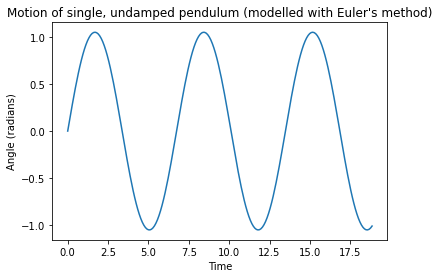

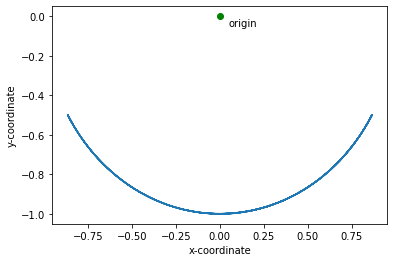

In [4]:
# Question 5.2

a_0 = 0
v_0 = 1
dt = 6 * np.pi / 200
T = 6 * np.pi

t, v, a, x, y = pendulum(a_0, v_0, dt, T)

plt.plot(t, a)
plt.title("Motion of single, undamped pendulum (modelled with Euler's method)")
plt.xlabel("Time")
plt.ylabel("Angle (radians)")
plt.show()

plt.plot(x, y)
plt.plot(0, 0, "go")
plt.text(0.05, -0.05, "origin")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.show()

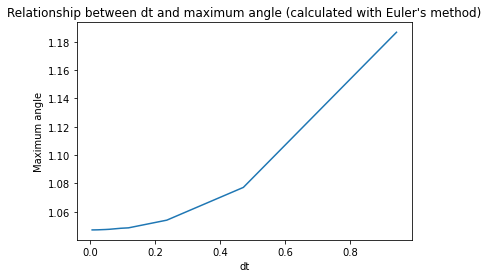

+--------------------+---------+--------------------+--------------------+
|    dt [6*pi/denom] |   denom |           max a(i) |    |max a(i) - a*| |
+====================+=========+====================+====================+
| 0.9424777960769379 |      20 | 1.1866614120560433 | 0.1394638608594456 |
+--------------------+---------+--------------------+--------------------+
| 0.4712388980384690 |      40 | 1.0772005622286176 | 0.0300030110320200 |
+--------------------+---------+--------------------+--------------------+
| 0.2356194490192345 |      80 | 1.0540873185574524 | 0.0068897673608548 |
+--------------------+---------+--------------------+--------------------+
| 0.1178097245096172 |     160 | 1.0486641610576781 | 0.0014666098610805 |
+--------------------+---------+--------------------+--------------------+
| 0.0942477796076938 |     200 | 1.0483658904910729 | 0.0011683392944752 |
+--------------------+---------+--------------------+--------------------+
| 0.0589048622548086 |   

In [5]:
# Question 5.3

denominators = [
    20, 40, 80, 160, 200, 320, 400, 800, 1600, 3200
]

dt_values = np.array([], dtype=np.float64)
row_labels = []

for denom in denominators:
    dt_values = np.append(dt_values, [6 * np.pi / denom])
    
a_0 = 0
v_0 = 1
T = 6 * np.pi

a_values = np.array([], dtype=np.float64) 
t_values = np.array([], dtype=np.float64)
max_a = np.array([], dtype=np.float64)

cell_text = []

a_converge = np.float64(np.pi/3)

i = 0
for dt in dt_values:
    t, v, a, _, _ = pendulum(a_0, v_0, dt, T)
    max_a = np.append(max_a, [max(a)])
    
    cell_text.append([dt_values[i], denominators[i], str(max(a)), str(abs(a_converge - max(a)))])
    i += 1

plt.plot(dt_values, max_a)
plt.title("Relationship between dt and maximum angle (calculated with Euler's method)")
plt.xlabel("dt")
plt.ylabel("Maximum angle")

plt.show()

table = tabulate(
    cell_text,
    headers=["dt [6*pi/denom]", "denom", "max a(i)", "|max a(i) - a*|"],
    tablefmt="grid",
    floatfmt=".16f",
)

print(table)

In [208]:
# Question 5.4

def midpoint(a_0, v_0, dt, T):
    """
    Model the motion of a single, undamped pendulum using the midpoint method.
    
    Input:  a_0    initial angle
            v_0    initial velocity
            dt     time step
            T      final time
        
    Output: t      time array
            v      velocity array
            a      angle array
            x      x-coordinate array
            y      y-coordinate array
    """
    
    g = np.float64(1) # We assume g and l to be 1
    l = np.float64(1)
    
    n = np.int64(T / dt) # Find number of steps 
    
    a = np.zeros([n + 1], dtype=np.float64) # a angle
    v = np.zeros([n + 1], dtype=np.float64) # v velocity
    t = np.zeros([n + 1], dtype=np.float64) # t time
    
    a[0] = np.float64(a_0) # Initial values
    v[0] = np.float64(v_0)
    
    def f(t, a):
        return -1 * g * np.sin(a) / l
    
    for i in range(n):
        t_mid = t[i] + 0.5 * dt
        v_mid = v[i] + 0.5 * dt * f(t[i], a[i])
        a_mid = a[i] + 0.5 * dt * v[i + 1]
        
        t[i + 1] = t[i] + dt
        v[i + 1] = v[i] + dt * f(t_mid, a_mid)
        a[i + 1] = a[i] + dt * v[i + 1]
    
    x = np.sin(a)
    y = -np.cos(a)
    
    return t, v, a, x, y



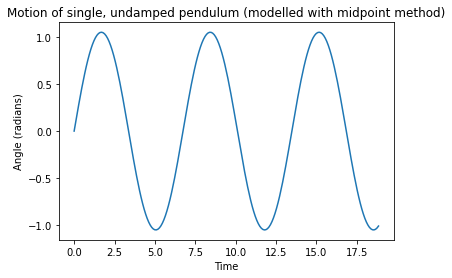

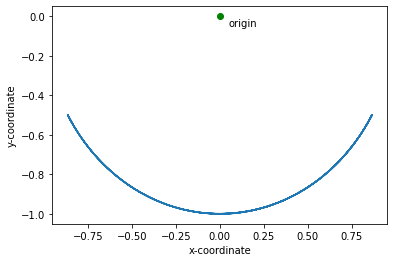

In [209]:
# Question 5.2

a_0 = 0
v_0 = 1
dt = 6 * np.pi / 200
T = 6 * np.pi

t, v, a, x, y = midpoint(a_0, v_0, dt, T)

plt.plot(t, a)
plt.title("Motion of single, undamped pendulum (modelled with midpoint method)")
plt.xlabel("Time")
plt.ylabel("Angle (radians)")
plt.show()

plt.plot(x, y)
plt.plot(0, 0, "go")
plt.text(0.05, -0.05, "origin")
plt.xlabel("x-coordinate")
plt.ylabel("y-coordinate")
plt.show()

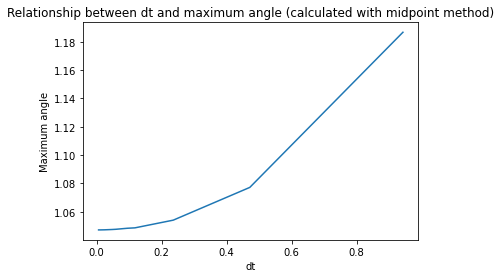

+--------------------+---------+--------------------+--------------------+
|    dt [6*pi/denom] |   denom |           max a(i) |    |max a(i) - a*| |
+====================+=========+====================+====================+
| 0.9424777960769379 |      20 | 1.1866614120560433 | 0.1394638608594456 |
+--------------------+---------+--------------------+--------------------+
| 0.4712388980384690 |      40 | 1.0772005622286176 | 0.0300030110320200 |
+--------------------+---------+--------------------+--------------------+
| 0.2356194490192345 |      80 | 1.0540873185574524 | 0.0068897673608548 |
+--------------------+---------+--------------------+--------------------+
| 0.1178097245096172 |     160 | 1.0486641610576781 | 0.0014666098610805 |
+--------------------+---------+--------------------+--------------------+
| 0.0942477796076938 |     200 | 1.0483658904910729 | 0.0011683392944752 |
+--------------------+---------+--------------------+--------------------+
| 0.0589048622548086 |   

In [210]:
# Question 5.4

denominators = [
    20, 40, 80, 160, 200, 320, 400, 800, 1600, 3200
]

dt_values = np.array([], dtype=np.float64)
row_labels = []

for denom in denominators:
    dt_values = np.append(dt_values, [6 * np.pi / denom])
    
a_0 = 0
v_0 = 1
T = 6 * np.pi

a_values = np.array([], dtype=np.float64) 
t_values = np.array([], dtype=np.float64)
max_a = np.array([], dtype=np.float64)

cell_text = []

a_converge = np.float64(np.pi/3)

i = 0
for dt in dt_values:
    t, v, a, _, _ = midpoint(a_0, v_0, dt, T)
    a_values = np.append(a_values, [a])
    t_values = np.append(t_values, [t])
    max_a = np.append(max_a, [max(a)])
    
    cell_text.append([dt_values[i], denominators[i], str(max(a)), str(abs(a_converge - max(a)))])
    i += 1

plt.plot(dt_values, max_a)
plt.title("Relationship between dt and maximum angle (calculated with midpoint method)")
plt.xlabel("dt")
plt.ylabel("Maximum angle")

plt.show()

table = tabulate(
    cell_text,
    headers=["dt [6*pi/denom]", "denom", "max a(i)", "|max a(i) - a*|"],
    tablefmt="grid",
    floatfmt=".16f",
)

print(table)